# Shared  bikes case study

#### Problem Statement:
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the data

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of dataset
df.shape

(730, 16)

In [4]:
# Get info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Describe dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing redundant & unwanted columns
- `instant` : Its only an index value.
- `dteday` : This has the date, Since we already have seperate columns for 'year' & 'month' we could live without      this column.
- `casual & registered` : These columns contains the count of bike booked by different categories of customers        Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these          columns.

In [6]:
# Drop columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [7]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

In [8]:
# List of numerical columns
numeric_col = list(df.loc[:, 'temp':'windspeed'].columns)

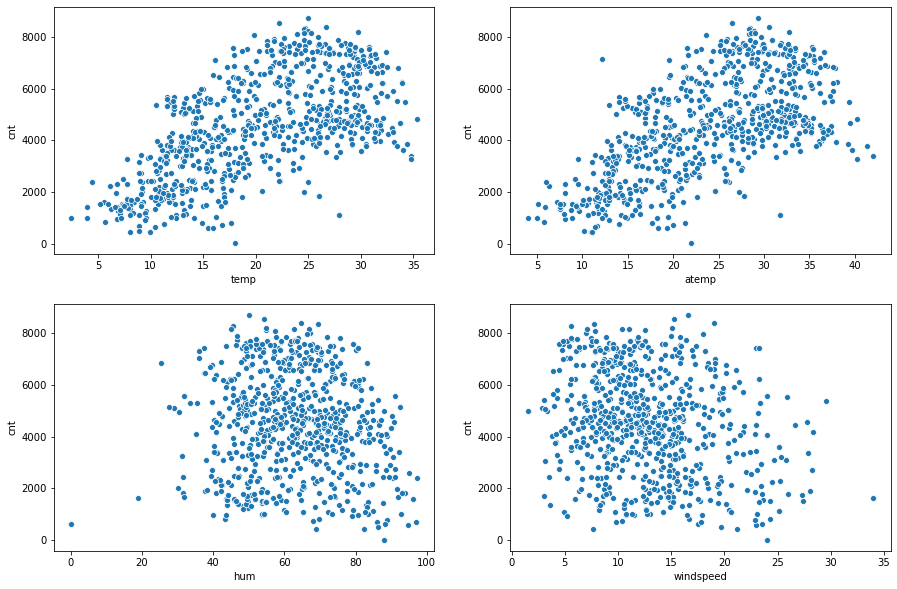

In [9]:
# Make scatter for numeric variable vs cnt
j = 1
plt.figure(figsize=[15,10])
for i in numeric_col:
    plt.subplot(2,2,j)
    sns.scatterplot(y=df.cnt, x=df[i])
    j = j + 1
plt.show()

### Visualising Categorical Variables

- we will have to convert `'mnth', 'weekday', 'season' & 'weathersit'` into 'category' data types.

In [10]:
# Convert to 'category' data type
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')

In [11]:
# List of categorical columns
categorical_col = list(df.loc[:, 'season':'weathersit'].columns)

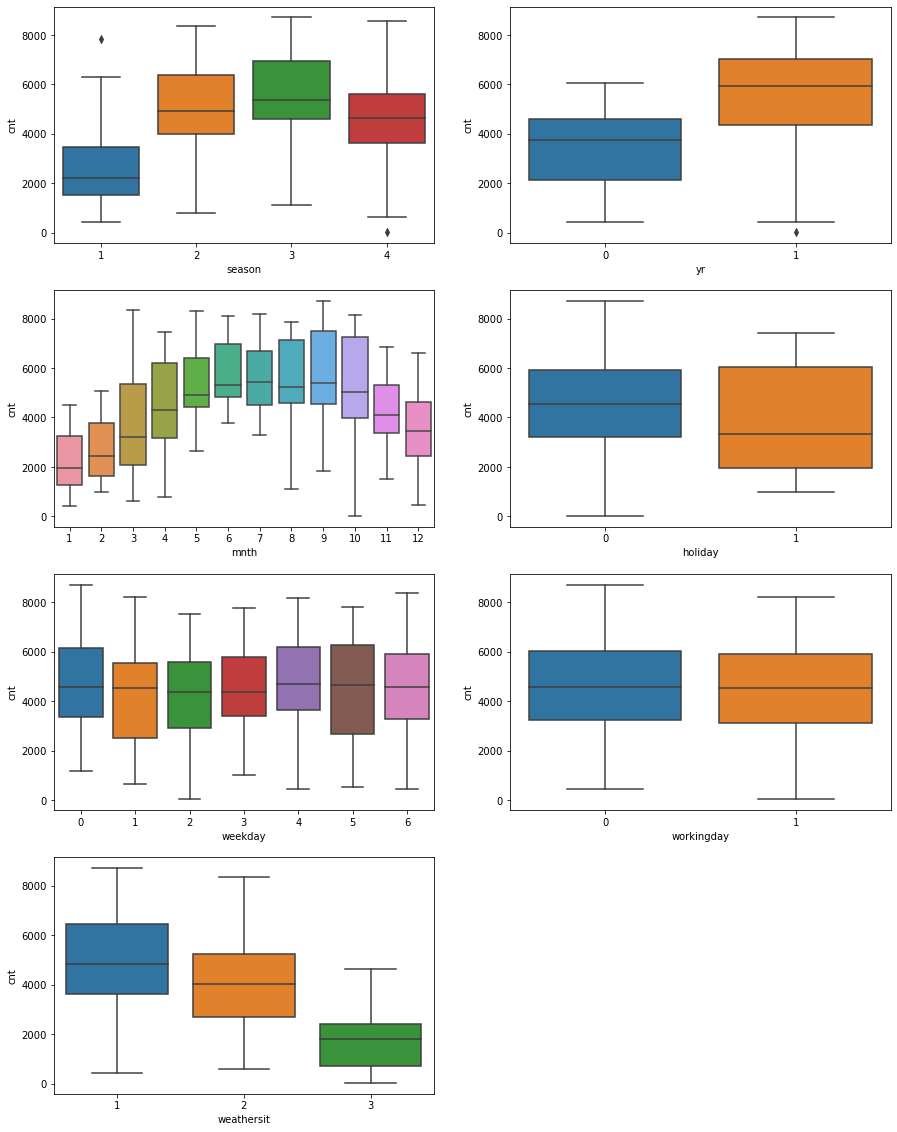

In [12]:
# Make barplot for categorical variable vs cnt
j = 1
plt.figure(figsize=[15,20])
for i in categorical_col:
    plt.subplot(4,2,j)
    sns.boxplot(df[i], df['cnt'])
    j = j + 1
plt.show()

## Step 3: Data Preparation

### Creating Dummy Variables
- We will create DUMMY variables for 4 categorical variables `'mnth', 'weekday', 'season' & 'weathersit'`.

In [13]:
# Create Dummy variable
# Drop original variable for which the dummy was created
# Drop first dummy variable for each set of dummies created.
df = pd.get_dummies(df, drop_first=True)

# Visualise the changes after the dummy creation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [14]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features using MinMaxScaler

In [16]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Create object of MinMaxScaler
scaler = MinMaxScaler()

In [18]:
# Rescale variable
col = list(['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
df_train[col] = scaler.fit_transform(df_train[col])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


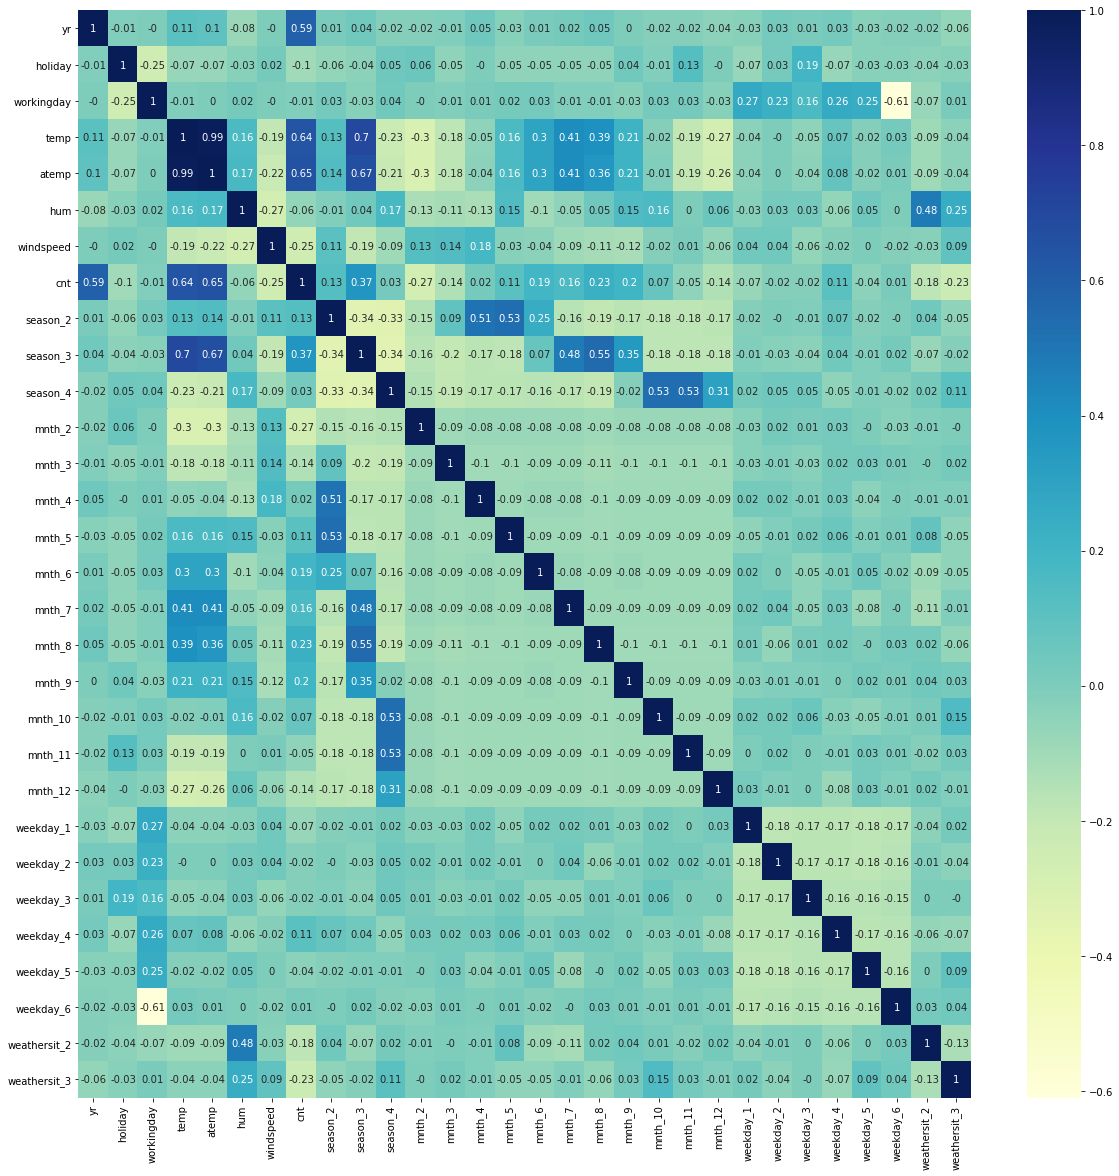

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(round(df_train.corr(), 2), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [20]:
# Create X and y variable
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [26]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [27]:
# Build a linear model using all variable
import statsmodels.api as sm

# Add constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_1.params

const           0.237574
yr              0.230385
holiday        -0.089060
temp            0.484667
hum            -0.178353
windspeed      -0.183595
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64

In [28]:
# Summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.95e-189
Time:                        11:14:36   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [29]:
# Import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3,8.80
4,windspeed,3.80
5,season_2,3.73
7,season_4,3.13
13,weathersit_2,2.15
0,yr,2.04
10,mnth_8,1.85
9,mnth_5,1.68


### Dropping the variable and updating the model

Temp has very high VIF but it is important variable for company.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a high VIF `15.55`.

In [31]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop('hum', 1)

### Model 2

In [32]:
# Add constant
X_train_lm = sm.add_constant(X)

# Create fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [33]:
# Summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.03e-185
Time:                        11:14:36   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1365      0.017      7.893   

In [34]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.99
5,season_3,8.42
4,season_2,3.68
3,windspeed,3.46
6,season_4,2.97
0,yr,2.04
9,mnth_8,1.85
8,mnth_5,1.68
11,mnth_10,1.62
12,weathersit_2,1.50


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth_5` as it has a very high p-value `0.267`.

In [35]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_5', 1)

### Model 3

In [36]:
# Add constant
X_train_lm = sm.add_constant(X)

# Create fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Summary of the linear regression model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.33e-186
Time:                        11:14:36   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1359      0.017      7.861   

In [38]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.09
5,season_3,8.11
4,season_2,3.47
3,windspeed,3.40
6,season_4,2.92
0,yr,2.03
8,mnth_8,1.85
10,mnth_10,1.62
11,weathersit_2,1.50
9,mnth_9,1.49


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `season_3` as it has a very high VIF `8.11`.

In [39]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('season_3', 1)

### Model 4

In [40]:
# Add constant
X_train_lm = sm.add_constant(X)

# Create fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Summary of the linear regression model obtained
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.10e-186
Time:                        11:14:36   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1293      0.017      7.558   

In [42]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.30
0,yr,2.01
5,season_4,1.98
4,season_2,1.82
7,mnth_8,1.61
9,mnth_10,1.60
10,weathersit_2,1.49
8,mnth_9,1.34
6,mnth_3,1.19


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth_3` as it has a high p-value `0.082`.

In [43]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_3', 1)

### Model 5

In [44]:
# Add constant
X_train_lm = sm.add_constant(X)

# Create fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Summary of the linear regression model obtained
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.21e-187
Time:                        11:14:36   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1355      0.017      8.079   

In [46]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.95
4,season_2,1.82
8,mnth_10,1.60
6,mnth_8,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.09


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth_10` as it has a high p-value `0.054`.

In [47]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_10', 1)

### Model 6

In [48]:
# Add constant
X_train_lm = sm.add_constant(X)

# Create fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Summary of the linear regression model obtained
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.26e-187
Time:                        11:14:36   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871   

In [50]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.81
6,mnth_8,1.58
5,season_4,1.49
8,weathersit_2,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


**INSIGHT**: - This model looks good, as there seems to be **VERY LOW** `Multicollinearity` between the predictors and the `p-values` for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### Final Model Interpretation

**F Statistics**
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant   the Model is.
- `F-statistic: 251.3`
- `Prob (F-statistic): 1.26e-187`

The F-Statistics value of 251.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is `significant`.

**The equation of best fitted surface based on model**

cnt = 0.131241 + (yr * 0.232489) - (holiday * 0.097109) + (temp * 0.517361) - (windspeed * 0.149737) + 
      (season_2 * 0.0999720) + (season_4 * 0.138343) + (mnth_8 * 0.054165) + (mnth_9 * 0.116177) - 
      (weathersit_2 * 0.082534) - (weathersit_3   -0.282834)

In [51]:
# Parameters of final model
lr_6.params.sort_values(ascending=False)

temp            0.517361
yr              0.232489
season_4        0.138343
const           0.131241
mnth_9          0.116177
season_2        0.099972
mnth_8          0.054165
weathersit_2   -0.082534
holiday        -0.097109
windspeed      -0.149737
weathersit_3   -0.282834
dtype: float64

## Step 6: Residual Analysis of the train data

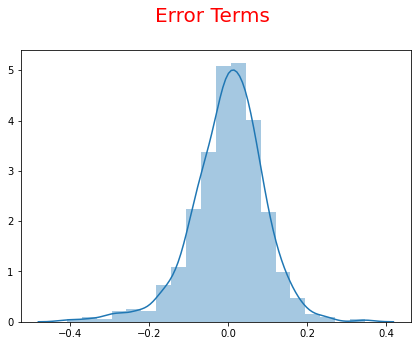

In [52]:
# Predict y_train_pred
y_train_pred = lr_6.predict(X_train_lm)

# Get diff btw y-train and y-predict
res = y_train - y_train_pred

# Plot the histogram of the error terms
plt.figure(figsize=[7, 5])
sns.distplot(res, bins = 20)
plt.title('Error Terms \n', color='red', fontsize=20)
plt.show()

**INSIGHT**: - From the above histogram, we could see that the Residuals are `normally distributed`. Hence our assumption for Linear Regression is valid.

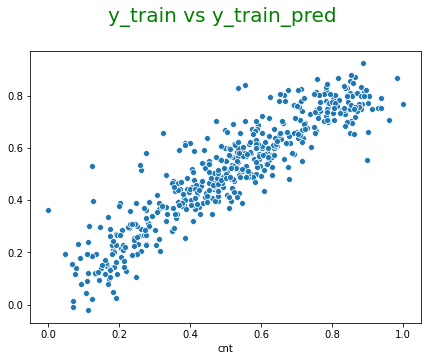

In [53]:
# Plot y_train vs y_train_predict values
plt.figure(figsize=[7, 5])
sns.scatterplot(y_train, y_train_pred)
plt.title('y_train vs y_train_pred \n', color='green', fontsize=20)
plt.show()

## Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [54]:
# Rescale variable
col = list(['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
df_test[col] = scaler.fit_transform(df_test[col])

In [55]:
# Create X and y from test data
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
# Remove other columns which are not availabe in model
X_test = X_test.loc[:, X.columns]

In [57]:
# Add constant
X_test_lm = sm.add_constant(X_test)

In [58]:
# Predict y value
y_test_pred = lr_6.predict(X_test_lm)

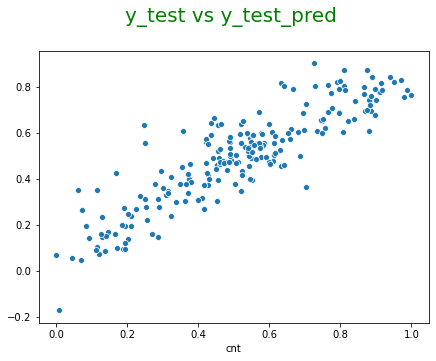

In [59]:
# Plot y_test vs y_test_predict values
plt.figure(figsize=[7, 5])
sns.scatterplot(y_test, y_test_pred)
plt.title('y_test vs y_test_pred \n', color='green', fontsize=20)
plt.show()

## R^2 Value for TEST

In [60]:
# Import r^2 from sklearn
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.7843451797101206

In [61]:
# We already have the value of R^2 (calculated in above step)
r2 = 0.7843451797101206

In [62]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.7739771595038765

**FINAL RESULT COMPARISON**: 
- Train R^2 :0.834 
- Train Adjusted R^2 :0.831
- Test R^2 :0.784
- Test Adjusted R^2 :0.773
- This seems to be a really good model that can very well 'Generalize' various datasets.